# Video Game Remastering Classifier

![image info](https://i.rtings.com/assets/pages/BZfoW14G/best-4k-gaming-tv-medium.jpg)

## Business Problem:

**Stakeholder**: Bluepoint Games The Gaming industry is a huge indutry with it's marjet sizd currently valued at $86 Billion in just the alone. This consits of the several gaming platforms and consoles accesible today. Platforms/Consoles such as the Playstation( PS5 latest model), Xbox One(latest model) or the Nintendo Switch as well as PC games. All coming from their respective publishing companies such as Sony, Microsoft, Nintendo and so on. As the industry continues to grow and technology evloves, new systems tend to be developed, with better graphics, better frame rates and more ineratice capabilities for the users. While ew games tend to be developed, many users tend to desire playing the games they enjoyed growing up that may be from older systems or froma time when technology was limited. Where the graphics were limited and maybe not in 4k resoluton as many games are now. Thus introducing remastering and remaking these games.

With a remaster, these game companies can rerelase old cult classic games with improvements to the hardware for uodated gaming. In addition games can also be remade. Taking these old games, and a process of shot-by-shot recreating it. So now the question becomes what games should be remastered. The Stakeholder : Bluepoint Games. Ive been tasked with buidling machine learing model and predicting which old games should be remastered or remade for this new age of gamers.


# Data Preparaton

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from statsmodels.api import qqplot
from scipy import stats
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# loading in and exploring dataset
# Read in csv file and preview DataFrame
df = pd.read_csv('Data/Video_Games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


- Global Sales is a total of NA, EU and Jp Sales columns.

- Can see there are alot of missing values. Especially in User Score and User count. Critic Score and Critic count.

- Missing Values in Developer & Ratings column.
 
- Rating  and Developer can be dropped. No relevance to business problem. Alot of null values.

Next lets look at the distribution of some of the columns

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Distribution')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


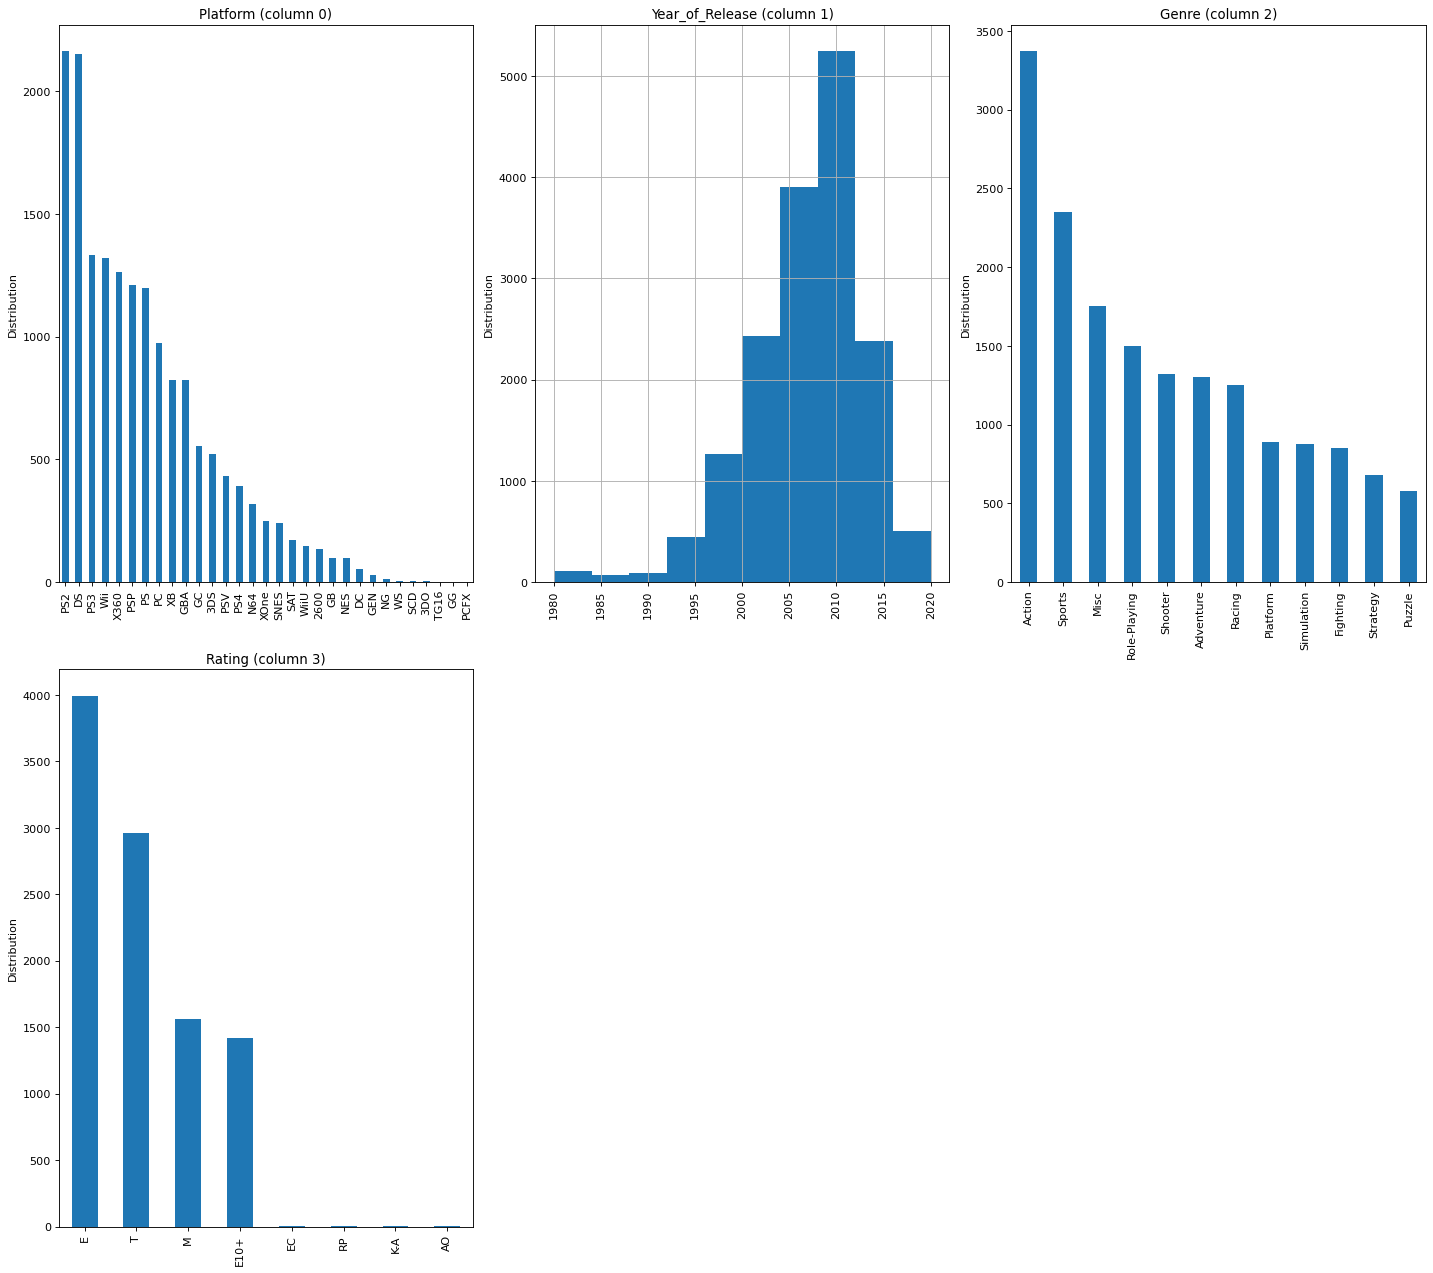

In [5]:
plotPerColumnDistribution(df, 25, 3)

In [6]:
df['Developer'].value_counts()

Ubisoft                     204
EA Sports                   172
EA Canada                   167
Konami                      162
Capcom                      139
                           ... 
Mere Mortals                  1
Sun-Tec                       1
InterActive Vision Games      1
Delta Factory                 1
Vogster                       1
Name: Developer, Length: 1696, dtype: int64

In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
systems = df['Platform'].unique()
print(sorted(systems))
# 31 different game systems 

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [9]:
print(df['Year_of_Release'].min())
print(df['Year_of_Release'].max())

1980.0
2020.0


In [10]:
print(df['Critic_Score'].min())
print(df['Critic_Score'].max())

13.0
98.0


# Data Cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Next I drop Null values within the column  of Year of Release, Name, and Publisher

In [12]:
df.drop(df[df.Year_of_Release.isnull()].index, inplace = True) #remove null value in Year of release column
df.drop(df[df.Name.isnull()].index, inplace = True) #remove null value in Name column
df.drop(df[df.Publisher.isnull()].index, inplace = True) #remove null value in Publisher column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


- Dropping developerand dropping rating  column due to its non relevance in the business problem

In [14]:
df = df.drop('Rating', 1)

In [15]:
df = df.drop('Developer', 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Converting user_score fron an object to an integer so that it can be filled with the median. This will address our issue of games not having an user score. I do not want to drop all the nulls since that removes are large amout of games in the dataset.

In [17]:
#convert User_score from object to integer
df.User_Score = pd.to_numeric(df.User_Score, errors='coerce')

In [18]:
print(df['User_Score'].min())
print(df['User_Score'].max())

0.0
9.7


- User Score is on a scle of 0 - 10 

- Critic score is one. scale of 0 - 100
- Next I convert critic score to the same scale of user scores for more uniformity. 

In [19]:
#scale down critic score to user score
df['Critic_Score'] = df['Critic_Score'] / 10

In [20]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [21]:
df['Genre'].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

# EDA

- First we look at the distribution of the columns

<ipython-input-22-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>],
       [<AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>,
        <AxesSubplot:title={'center':'User_Score'}>],
       [<AxesSubplot:title={'center':'User_Count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

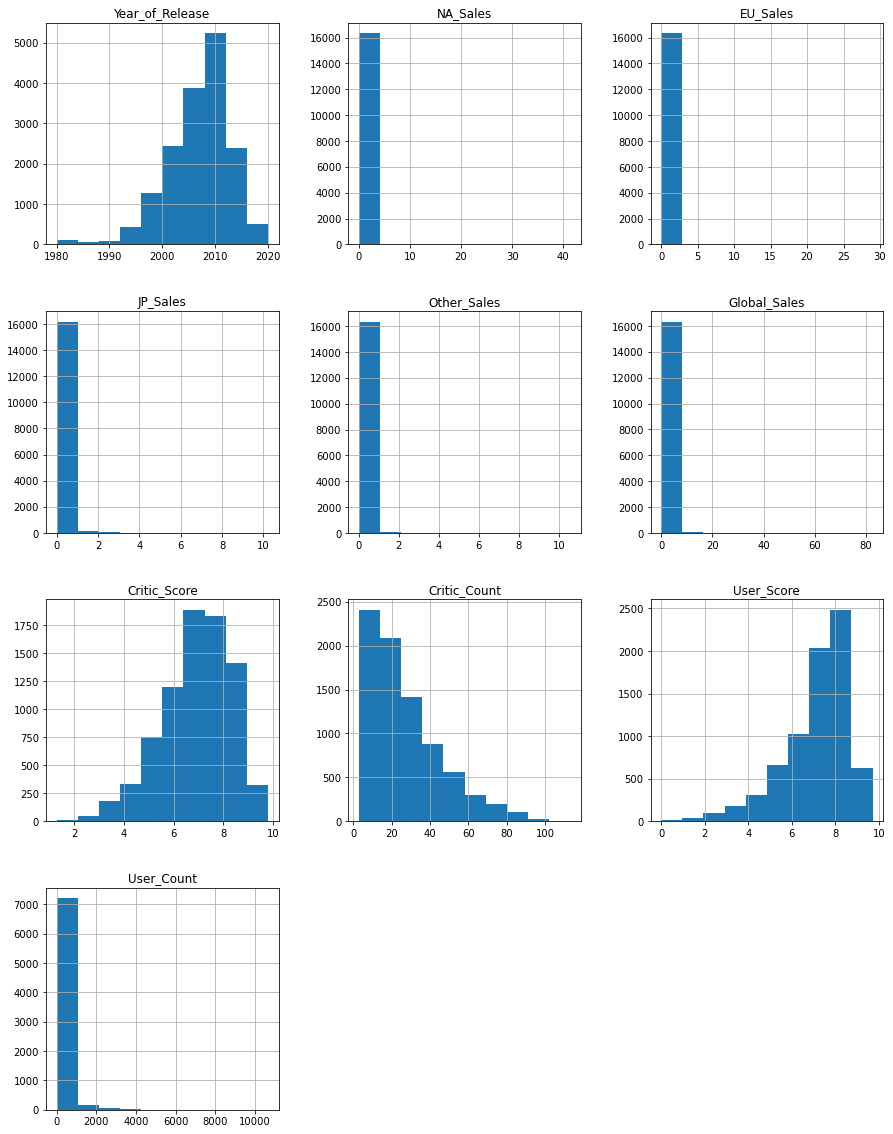

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

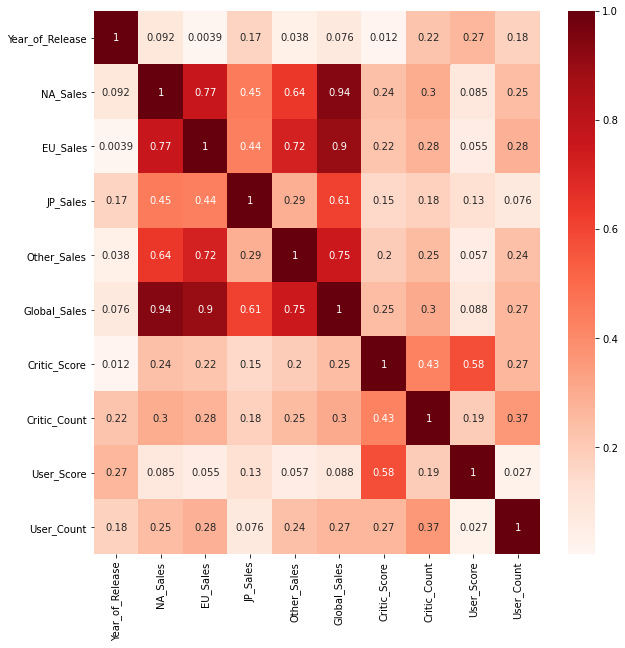

In [23]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='Reds', annot=True);

count    16416.000000
mean      2006.489888
std          5.881148
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64


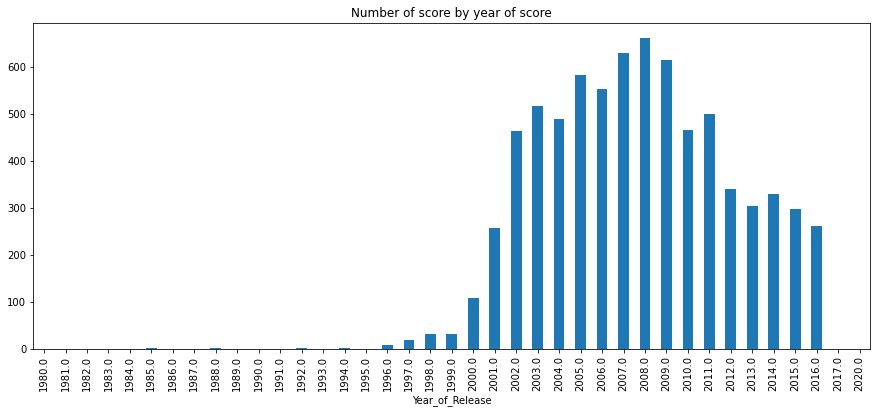

In [24]:
print(df['Year_of_Release'].describe()) 

# Number rating by rating year
df.groupby('Year_of_Release').count().User_Score.plot(kind='bar', figsize=(15,6))
plt.title('Number of score by year of score');

- Next I look at which genres is most prevalent in the dataset

AxesSubplot(0.125,0.125;0.775x0.755)


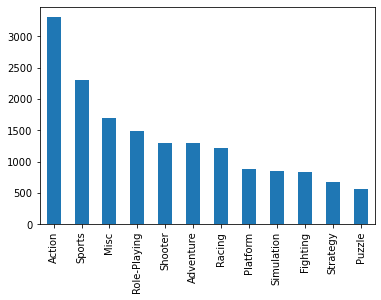

In [25]:
print(df['Genre'].value_counts().plot(kind='bar'))

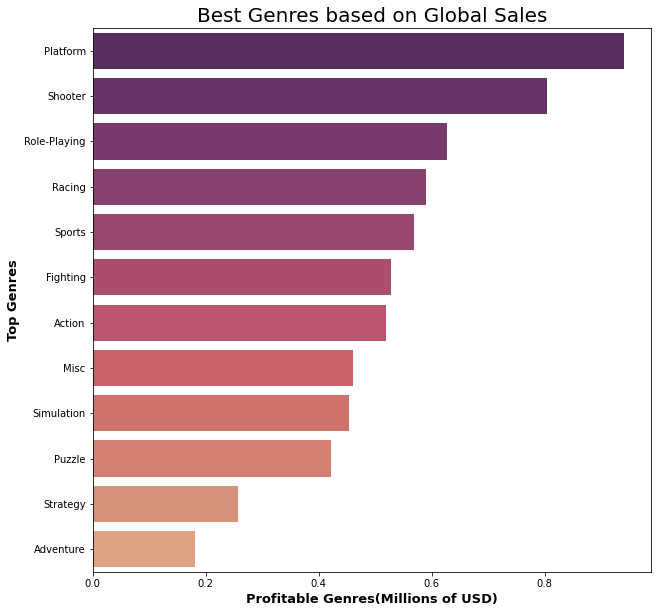

In [26]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize=(10, 10))

#Group by box office, calculate sum of box office and sort by box office
aggregation_functions1 = {'Global_Sales': 'mean'}
df1 = df.groupby(df['Genre']).aggregate(aggregation_functions1).reset_index()
df1.sort_values('Global_Sales', inplace = True, 
               ascending = False, ignore_index = True)

#Plot using box office and rating 
sns.barplot(x = "Global_Sales", y = "Genre", 
              data = df1, palette = 'flare_r', ci = None)

#Setting title and labels
ax.set_xlabel('Profitable Genres(Millions of USD)', fontsize = 13, weight = 'bold')
ax.set_ylabel('Top Genres', fontsize = 13, weight = 'bold')
ax.set_title('Best Genres based on Global Sales', fontsize = 20);

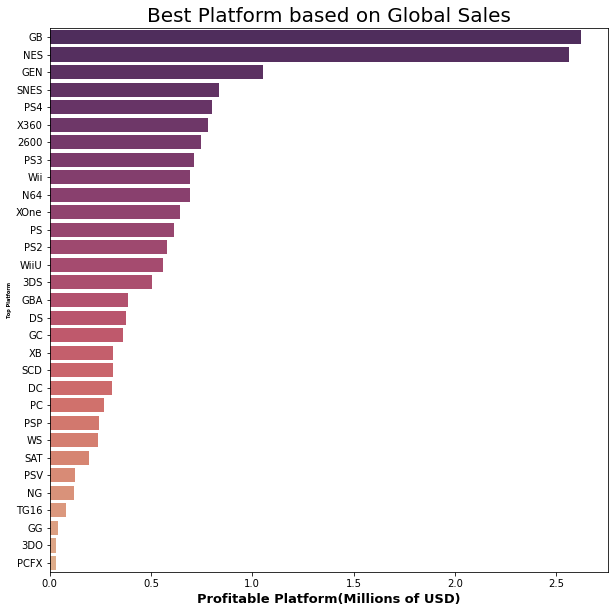

In [27]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize=(10, 10))

#Group by box office, calculate sum of box office and sort by box office
aggregation_functions1 = {'Global_Sales': 'mean'}
df1 = df.groupby(df['Platform']).aggregate(aggregation_functions1).reset_index()
df1.sort_values('Global_Sales', inplace = True, 
               ascending = False, ignore_index = True)

#Plot using box office and rating 
sns.barplot(x = "Global_Sales", y = "Platform", 
              data = df1, palette = 'flare_r', ci = None)

#Setting title and labels
ax.set_xlabel('Profitable Platform(Millions of USD)', fontsize = 13, weight = 'bold')
ax.set_ylabel('Top Platform', fontsize = 5, weight = 'bold')
ax.set_title('Best Platform based on Global Sales', fontsize = 20);

In [28]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


 ## Dropping Wii Games

In [29]:
df =df.drop(0)

In [30]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16415 non-null  object 
 1   Platform         16415 non-null  object 
 2   Year_of_Release  16415 non-null  float64
 3   Genre            16415 non-null  object 
 4   Publisher        16415 non-null  object 
 5   NA_Sales         16415 non-null  float64
 6   EU_Sales         16415 non-null  float64
 7   JP_Sales         16415 non-null  float64
 8   Other_Sales      16415 non-null  float64
 9   Global_Sales     16415 non-null  float64
 10  Critic_Score     7981 non-null   float64
 11  Critic_Count     7981 non-null   float64
 12  User_Score       7460 non-null   float64
 13  User_Count       7460 non-null   float64
dtypes: float64(10), object(4)
memory usage: 1.9+ MB


In [32]:
df['Global_Sales'].max()

40.24

In [33]:
df['User_Score'].mean()

7.126782841823057

In [34]:
df['Critic_Score'].fillna((df['Critic_Score'].mean()), inplace=True)
df['Critic_Count'].fillna((df['Critic_Count'].mean()), inplace=True)
df['User_Score'].fillna((df['User_Score'].mean()), inplace=True)
df['User_Count'].fillna((df['User_Count'].mean()), inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16415 non-null  object 
 1   Platform         16415 non-null  object 
 2   Year_of_Release  16415 non-null  float64
 3   Genre            16415 non-null  object 
 4   Publisher        16415 non-null  object 
 5   NA_Sales         16415 non-null  float64
 6   EU_Sales         16415 non-null  float64
 7   JP_Sales         16415 non-null  float64
 8   Other_Sales      16415 non-null  float64
 9   Global_Sales     16415 non-null  float64
 10  Critic_Score     16415 non-null  float64
 11  Critic_Count     16415 non-null  float64
 12  User_Score       16415 non-null  float64
 13  User_Count       16415 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.9+ MB


In [36]:
df['User_Score'].mean()

7.126782841823056

 ## Bin Sales and User Score 

- Here I create two new columns for binned global sales and binned User Score
- Splitting them into two categories. Low and High

In [37]:
df['User_Score'].describe()

count    16415.000000
mean         7.126783
std          1.010464
min          0.000000
25%          7.126783
50%          7.126783
75%          7.300000
max          9.700000
Name: User_Score, dtype: float64

In [38]:
bins = [ 0,7.126783,9.7]
labels =['low','high']
df['Score_Bin'] = pd.cut(df['User_Score'], bins,labels=labels)


df['Score_Bin'].value_counts()

low     11994
high     4420
Name: Score_Bin, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
dtypes: category(1), float64(10), object(4)
memory usage: 1.9+ MB


In [40]:
df['Global_Sales'].describe()

count    16415.000000
mean         0.531713
std          1.422596
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         40.240000
Name: Global_Sales, dtype: float64

In [41]:
# Binning Global sales

In [42]:
binz = [  0.010000,0.170000,40.240000]

labelz = ['low','high']

df['bins_sales'] = pd.cut(df['Global_Sales'], bins=binz, labels=labelz)
df['bins_sales'].value_counts()

high    8057
low     7737
Name: bins_sales, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       15794 non-null  category
dtypes: category(2), float64(10), object(4)
m

In [44]:
df['bins_sales'].value_counts()

high    8057
low     7737
Name: bins_sales, dtype: int64

In [45]:
top_rated_games = df.loc[df['Score_Bin'] == 'high']
top_rated_games.sort_values('Global_Sales',ascending = False).head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Score_Bin,bins_sales
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0,high,high
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8.0,192.0,high,high
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.9,65.0,8.5,431.0,high,high
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,8.7,80.0,8.4,594.0,high,high
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,9.1,64.0,8.6,464.0,high,high
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,8.0,63.0,7.7,146.0,high,high
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,8.0,33.0,7.4,52.0,high,high
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,9.7,50.0,8.2,3994.0,high,high
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,9.5,80.0,9.0,1588.0,high,high
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,7.7,58.0,7.9,50.0,high,high


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       15794 non-null  category
dtypes: category(2), float64(10), object(4)
m

<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


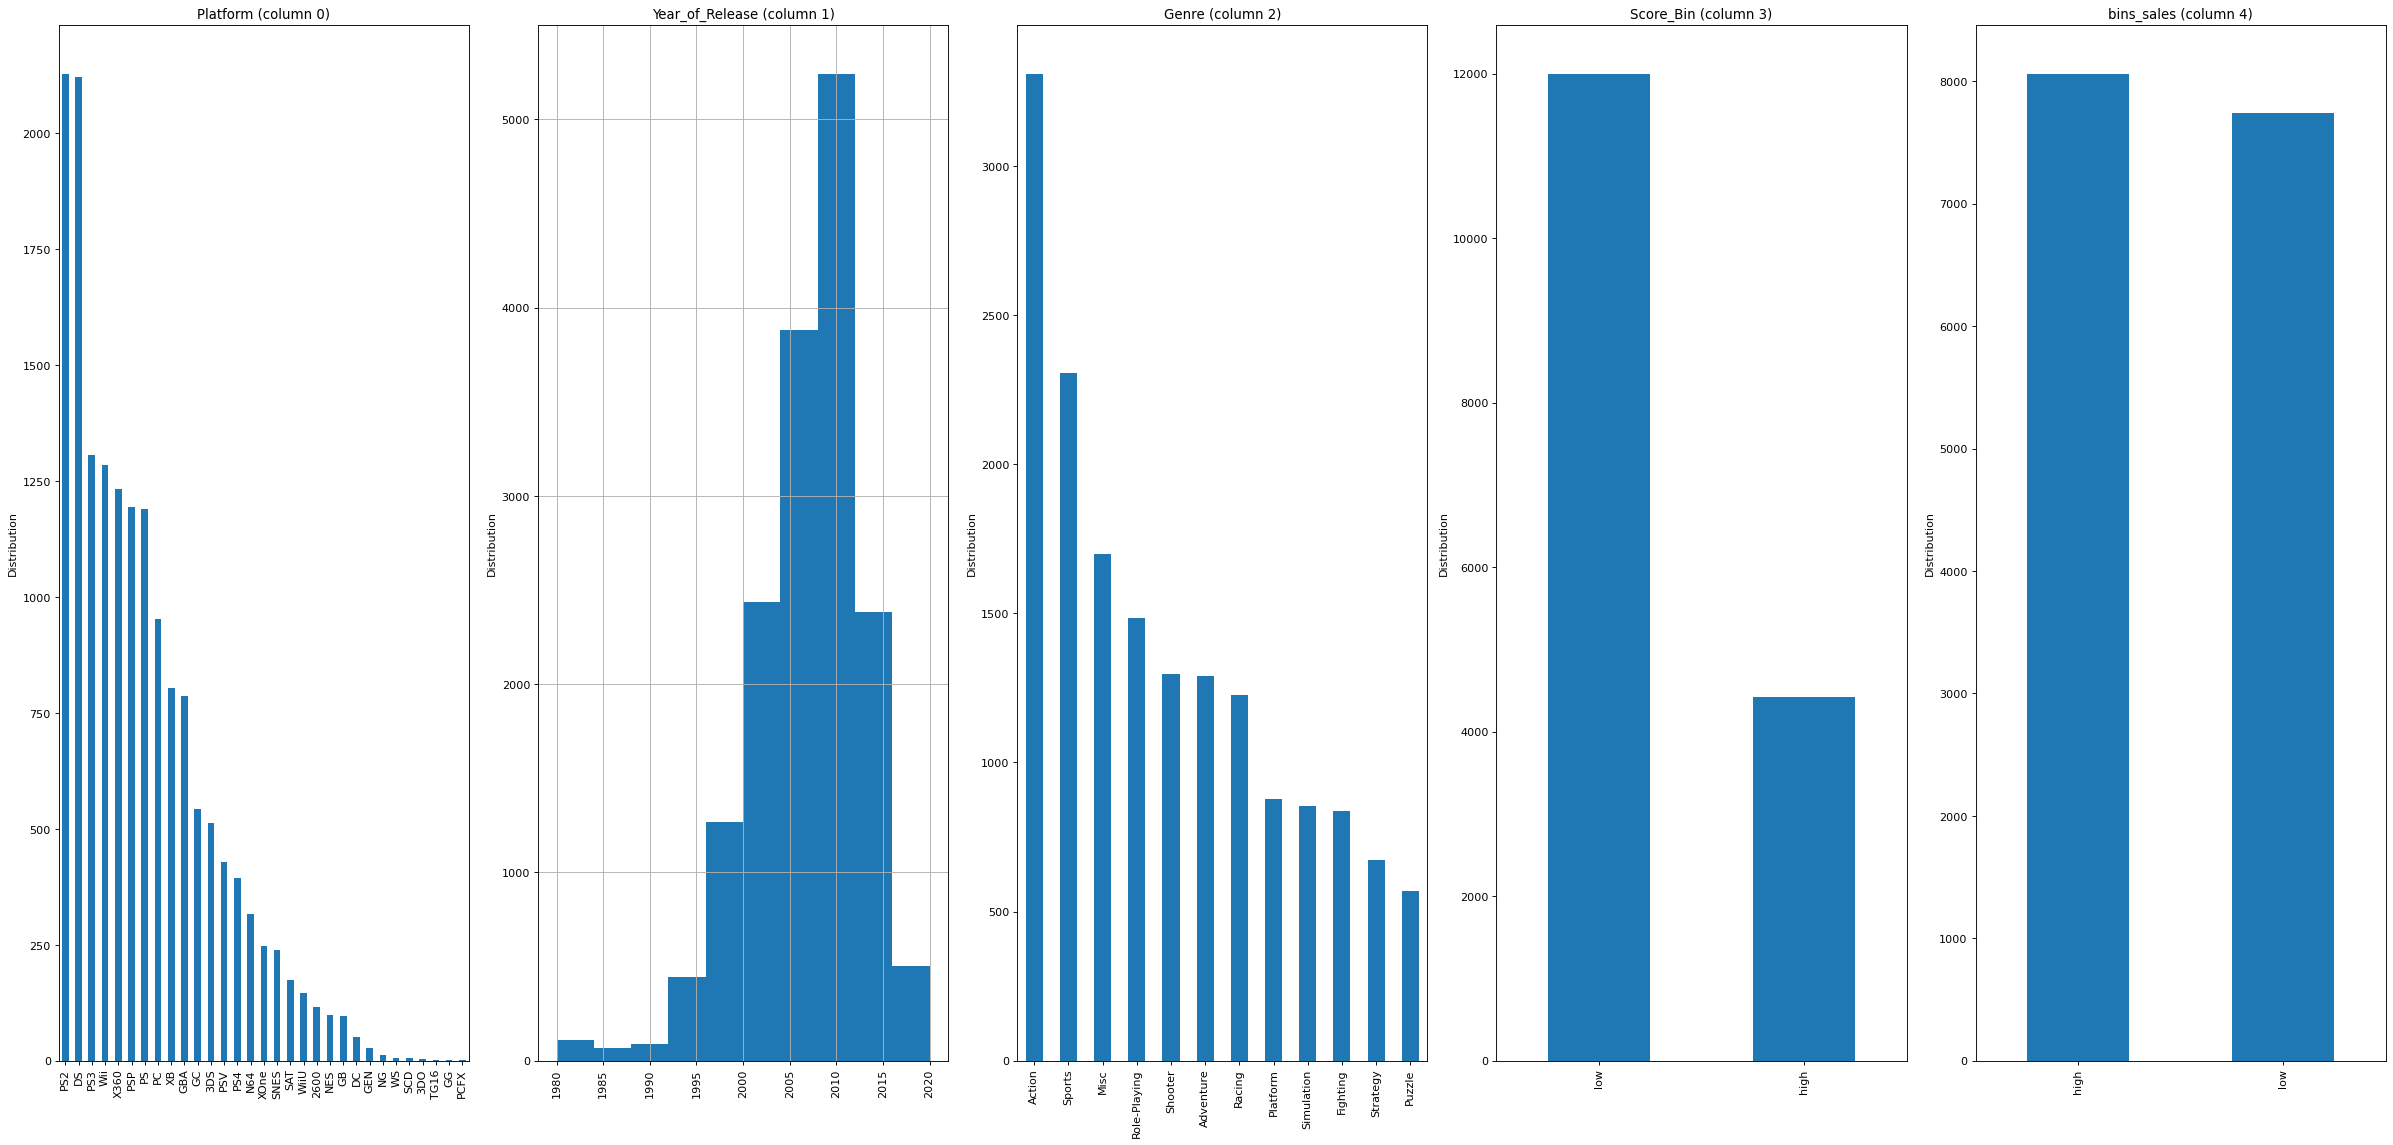

In [47]:
plotPerColumnDistribution(df, 10, 5)

In [48]:
#df['Critic_Score'].fillna((df['Critic_Score'].mean()), inplace=True)
#df['Critic_Count'].fillna((df['Critic_Count'].mean()), inplace=True)
#df['User_Score'].fillna((df['User_Score'].mean()), inplace=True)
#df['User_Count'].fillna((df['User_Count'].mean()), inplace=True)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       15794 non-null  category
dtypes: category(2), float64(10), object(4)
m

In [50]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Score_Bin,bins_sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.899624,26.437915,7.126783,162.987534,low,high
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.200000,73.000000,8.300000,709.000000,high,high
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.000000,73.000000,8.000000,192.000000,high,high
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.899624,26.437915,7.126783,162.987534,low,high
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6.899624,26.437915,7.126783,162.987534,low,high


- dropping any remaining null values

In [51]:
df = df.dropna()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 16080
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             15793 non-null  object  
 1   Platform         15793 non-null  object  
 2   Year_of_Release  15793 non-null  float64 
 3   Genre            15793 non-null  object  
 4   Publisher        15793 non-null  object  
 5   NA_Sales         15793 non-null  float64 
 6   EU_Sales         15793 non-null  float64 
 7   JP_Sales         15793 non-null  float64 
 8   Other_Sales      15793 non-null  float64 
 9   Global_Sales     15793 non-null  float64 
 10  Critic_Score     15793 non-null  float64 
 11  Critic_Count     15793 non-null  float64 
 12  User_Score       15793 non-null  float64 
 13  User_Count       15793 non-null  float64 
 14  Score_Bin        15793 non-null  category
 15  bins_sales       15793 non-null  category
dtypes: category(2), float64(10), object(4)
m

In [53]:
df['bins_sales'].value_counts()


high    8056
low     7737
Name: bins_sales, dtype: int64

In [54]:
df['Score_Bin'].value_counts()

low     11447
high     4346
Name: Score_Bin, dtype: int64

In [55]:
K= df['User_Score']==7.126782841823057
K.value_counts()

True     8468
False    7325
Name: User_Score, dtype: int64

 - Next is dummifying Platform Column to convert string values to binary values. 

In [56]:
df = pd.get_dummies(df, columns=['Platform'], drop_first=True)
df

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.899624,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.200000,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.000000,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.899624,...,0,0,0,0,0,0,0,0,0,0
5,Tetris,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6.899624,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16076,Evil Genius,2004.0,Strategy,Vivendi Games,0.00,0.01,0.00,0.00,0.02,7.500000,...,0,0,0,0,0,0,0,0,0,0
16077,Ouran Koukou Host Bu,2007.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02,6.899624,...,0,0,0,0,0,0,0,0,0,0
16078,King's Quest: The Complete Collection,2016.0,Adventure,Activision,0.01,0.00,0.00,0.00,0.02,6.899624,...,0,0,0,0,0,0,0,0,0,0
16079,Lotus Challenge,2004.0,Racing,Ignition Entertainment,0.01,0.00,0.00,0.00,0.02,6.899624,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.replace(to_replace='high', value=1, inplace=True) 
df.replace(to_replace='low', value=0, inplace=True) 


In [58]:
df['bins_sales']

1        1
2        1
3        1
4        1
5        1
        ..
16076    0
16077    0
16078    0
16079    0
16080    0
Name: bins_sales, Length: 15793, dtype: category
Categories (2, int64): [0 < 1]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 16080
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             15793 non-null  object  
 1   Year_of_Release  15793 non-null  float64 
 2   Genre            15793 non-null  object  
 3   Publisher        15793 non-null  object  
 4   NA_Sales         15793 non-null  float64 
 5   EU_Sales         15793 non-null  float64 
 6   JP_Sales         15793 non-null  float64 
 7   Other_Sales      15793 non-null  float64 
 8   Global_Sales     15793 non-null  float64 
 9   Critic_Score     15793 non-null  float64 
 10  Critic_Count     15793 non-null  float64 
 11  User_Score       15793 non-null  float64 
 12  User_Count       15793 non-null  float64 
 13  Score_Bin        15793 non-null  category
 14  bins_sales       15793 non-null  category
 15  Platform_3DO     15793 non-null  uint8   
 16  Platform_3DS     15793 non-null  uint8  

# Pre-Processing


##  TRAIN TEST SPLIT

In [60]:
X = df.drop(['bins_sales','Publisher','Name','EU_Sales','NA_Sales'], axis=1)
y = df['bins_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

#Scale data
#scale = StandardScaler()
#x_train_scaled = scale.fit_transform(x_train)
#x_test_scaled = scale.transform(x_test)



In [61]:
y_train.value_counts()

1    6018
0    5826
Name: bins_sales, dtype: int64

In [62]:
print(X.shape)
print(y.shape)

(15793, 40)
(15793,)


## ONE HOT ENCODE (GENRE AND USER_SCORE BIN COLUMN)

- Below is a function for onehotencoding the categorical columns in my dataset. Genre.

In [63]:
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
    # Reset indices to avoid merging conflicts
    x_train_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
    # Joined the OHE dataframe to the dataframe that is passed into the function
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df

In [64]:
X_train_encode = OHE(X_train,['Genre'])
X_test_encode = OHE(X_test,['Genre'])

## SCALE 

In [65]:
#Scale data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_encode)
X_test_scaled = scale.transform(X_test_encode)

In [66]:
y_train.value_counts()

1    6018
0    5826
Name: bins_sales, dtype: int64

In [67]:
y_train.value_counts()

1    6018
0    5826
Name: bins_sales, dtype: int64

- Next is the modeling Process. I WILL BE TESTING FOR F1 Score. Due to this being a more balanced evaluation metric. 

 # MODELING

## Dummy Baseline  Model

0.6738327175008397
0.6808084182395189


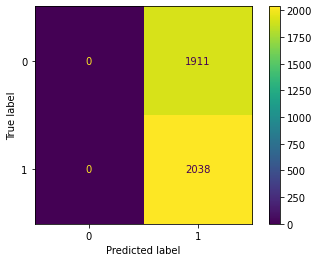

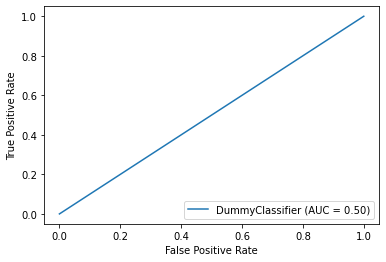

In [68]:

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train_scaled, y_train)
y_hat_train = dummy_model.predict(X_train_scaled)
y_hat_test = dummy_model.predict(X_test_scaled)
print(f1_score(y_train, y_hat_train, average= 'binary'))
print(f1_score(y_test, y_hat_test, average= 'binary'))
plot_confusion_matrix(dummy_model, X_test_scaled, y_test)
plot_roc_curve(dummy_model, X_test_scaled, y_test);

- I started with a DummyClassifier baseline model. This will be the first model and I will work to find models that outpreform this one. 
- about 68% score on acounting for  False Positives and  anf False Negatives

- AUC score of .5.  We want a AUC higher than this and closer to 1. 

# Decsion Tree Classifer

Train 1.0
Test 1.0


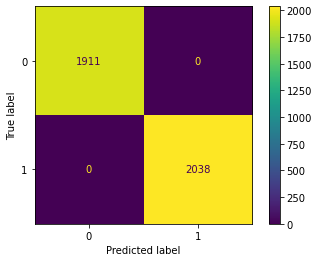

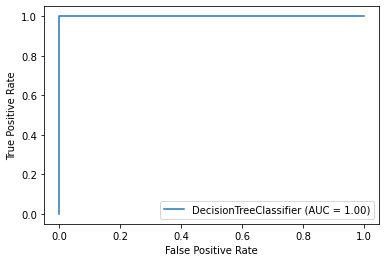

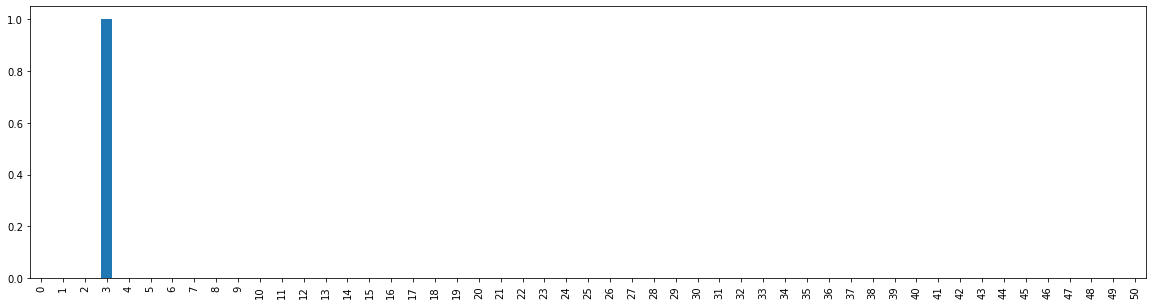

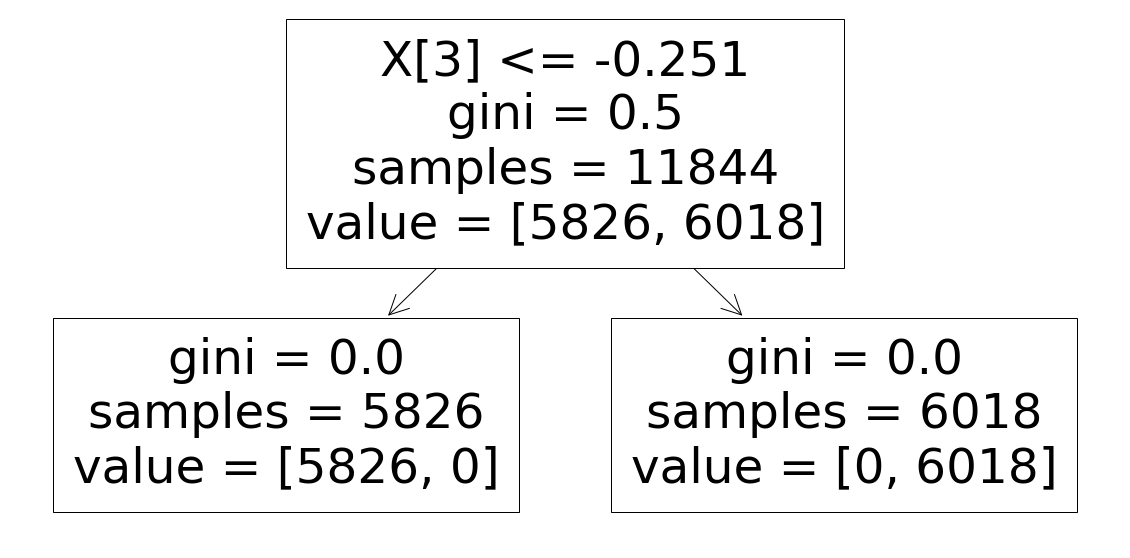

In [69]:
# Instantiated, fit, and ran basic decision tree model
clf = DecisionTreeClassifier(max_depth = 6) 
clf.fit(X_train_scaled, y_train)
y_hat_train = clf.predict(X_train_scaled)
y_hat_test = clf.predict(X_test_scaled)
print(f'Train {f1_score(y_train, y_hat_train)}')
print(f'Test {f1_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for basic decision tree model
plot_confusion_matrix(clf, X_test_scaled, y_test);
plot_roc_curve(clf, X_test_scaled, y_test);

# Plotted feature importance for basic decision tree model
ranking = clf.feature_importances_
fig, ax = plt.subplots(figsize=(20,5))
pd.Series(ranking).plot.bar(ax=ax);

# Plotted basic decision tree model
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf);

- Ran a Decision Tree Classifier with a max depth 6.
- No False Negatives and False Positives in the model.
- A perfect 1 F1 score on Train and Test.
- This model may be overfitting. 

## Logistic Regression

Train 0.9739159891598916
Test 0.9752438109527382
[[8.72137622e-01 1.90766777e+01 2.46455493e+05 9.93852729e+12
  1.04138638e+00 1.03834315e+00 9.50767768e-01 1.04024713e+00
  1.18364264e+00 9.37372866e-01 8.75798996e-01 9.24289527e-01
  7.58695395e-01 9.31180949e-01 1.01967300e+00 9.42928978e-01
  9.32709066e-01 9.54559185e-01 1.04411661e+00 9.52446889e-01
  9.67402411e-01 7.65313263e-01 9.57654908e-01 7.55515270e-01
  6.81548630e-01 7.63516281e-01 8.35612482e-01 7.35942341e-01
  7.93547691e-01 8.56104068e-01 9.01395617e-01 8.82706045e-01
  9.60045529e-01 9.83798641e-01 8.88271693e-01 9.61938669e-01
  8.77893022e-01 9.32508402e-01 9.61841054e-01 1.02923764e+00
  9.56341053e-01 9.72926956e-01 1.03704430e+00 1.00654410e+00
  9.34472968e-01 1.00807636e+00 1.01001433e+00 9.71586768e-01
  1.02996316e+00 1.02621334e+00 9.67038697e-01]]


/Users/olamideholayinka/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


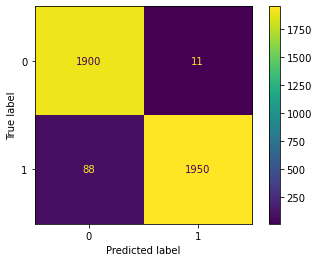

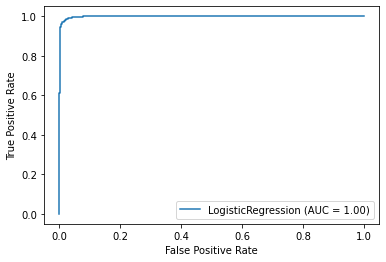

In [78]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_hat_train = lr.predict(X_train_scaled) 
y_hat_test = lr.predict(X_test_scaled) 
print(f'Train {f1_score(y_train, y_hat_train)}')
print(f'Test {f1_score(y_test, y_hat_test)}')

# Feature coefficients converted to odds ratios
print(np.exp(lr.coef_))

# Plotted confusion matrix and ROC AUC for basic logistic regression model
plot_confusion_matrix(lr, X_test_scaled, y_test)
plot_roc_curve(lr, X_test_scaled, y_test);


Logisitc Regression Model withought hyperparameter adjustments. 
This scored a 1 AUC score.
In additon a 97% score on TRain and Test F1-score.
Few false positives and false negatives in this model.

 ## NAIVE BEYES

In [71]:
gnb = GaussianNB(priors=[1/2, 1/2])
gnb.fit(X_train_scaled, y_train)

GaussianNB(priors=[0.5, 0.5])

In [72]:
gnb.score(X_test_scaled, y_test)

0.539630286148392

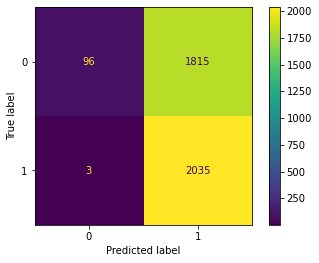

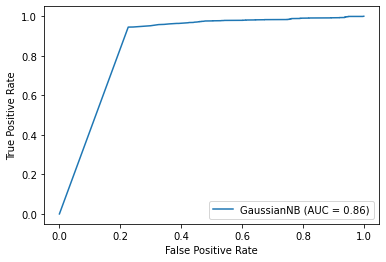

In [73]:
plot_confusion_matrix(gnb, X_test_scaled, y_test);
plot_roc_curve(gnb, X_test_scaled, y_test);

- Next was a Naive Bayes Classifier 
- The accuracy score on this was a 53% which is not great. 
- Alot of false positives in this model.
- AUC score of .86. which is close to 1. So the model is distingushing between classes fairly well.

## Random Tree Classifier

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5826
           1       1.00      1.00      1.00      6018

    accuracy                           1.00     11844
   macro avg       1.00      1.00      1.00     11844
weighted avg       1.00      1.00      1.00     11844

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      3949
   macro avg       1.00      1.00      1.00      3949
weighted avg       1.00      1.00      1.00      3949



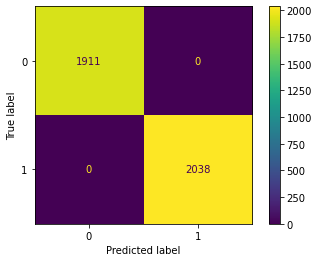

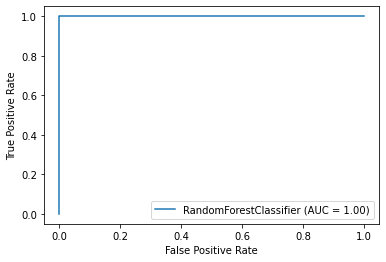

In [74]:
# Instantiate, fit, and run model
rfc = RandomForestClassifier(random_state=22)
rfc.fit(X_train_scaled, y_train)
y_hat_train = rfc.predict(X_train_scaled)
y_hat_test = rfc.predict(X_test_scaled)
print(f'Train: {classification_report(y_train, y_hat_train, zero_division=0)}')
print(f'Test: {classification_report(y_test, y_hat_test, zero_division=0)}')

# Plot confusion matrix and ROC AUC
plot_confusion_matrix(rfc, X_test_scaled, y_test)
plot_roc_curve(rfc, X_test_scaled, y_test);

- This model may be overfitting. Perfect score on every evaluation metric .
- Perfect AUC score

# Conclusion and Reccomendations

Logistic Regression Model turned out to be the best model. 

- In addition, we found that Platform and Shooter games outperfrmed other genres. 

- Games reelase between 2006 to 2008 contained the higehest user scores. 
- Nintendo has some of the hughest grossing games and highest selling platforms. Consider remastering a nintendo games. 

# NEXT STEPS / APPENDIX


- As for Next Steps, I would like to narow down a specifc criteria for how often after a game's initial release, should it be remastered. So based of the year of intial release, as well as the cycle of time it has been in circulation and it's user score and reception. In addition as I looked at Global Sales, I would like to go into Localized data and determined the games worthy of remastering based on it's sales and score per region.

In [75]:
#Identifying sequl Games
#df['remaster']=np.where((df['User_Score']>=78) & (df['Year_of_Release']<=2013),1,0)
#df['remaster'].value_counts()
# setting conditions for remaster criteria
#conditions = [
    #df['User_Score'] >= 7.8,
    #df['Year_of_Release'] <2013,
#]

#values =['1','1']

In [76]:
#Creating a Binary column for remaster. When considering what games to remaster. we want to include games that:
#- Have great User Scores, So the cutoff will be the mode 7.8. User scores are more imoortant than critic scores in this case beacuse some older games may not have critic scores and we wnat games that users themseveles enjoyed.
#- And we want to remaster older games that ahve not been out and available for the newest generation. SO the cutoff will be the year the Xbox One launched 2013